### Process Datase 3 and merged of(dataset 1 &2) and merger these two datasets and Procress it wit Visualization and staticstics analysis

In [1]:
 # Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis


### 1.Load DataSet 3

In [2]:
# Load Dataset3
file_path = "dataset_3.csv"
df1 = pd.read_csv(file_path)
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


### 2. Data Preprocessing

In [3]:
#list of columns names for df
print(df1.columns.tolist())

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [4]:
#Find Missing values
print("Missing Values:\n", df1.isnull().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


No missing values present in dataset

In [5]:
##Check Duplicate Values
print("\nDuplicate Rows:", df1.duplicated().sum())


Duplicate Rows: 0


no dulicate values present in dataset

In [6]:
# Remove unnecessary columnsc(yr and month ,because already there in date)
df1.drop(columns=['mnth', 'yr','instant'], inplace=True , errors='ignore')
df1.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,29-01-2011,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,29-01-2011,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,29-01-2011,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,29-01-2011,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,29-01-2011,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [7]:
# Check Data Types
print(df1.dtypes)

dteday         object
season          int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


 dteday is not an object , Its datetime Datatype 

In [8]:
#conver holiday in 0 nad 1
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1["holiday"]= label_encoder.fit_transform(df1["holiday"])
# Convert dteday
df1['dteday'] = pd.to_datetime(df1['dteday'], format='%d-%m-%Y')
# Check Data again
df1.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-29,1,1,0,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,2011-01-29,1,2,0,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,2011-01-29,1,3,0,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,2011-01-29,1,4,0,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,2011-01-29,1,6,0,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [9]:
# Check Data Types
print(df1.dtypes)

dteday        datetime64[ns]
season                 int64
hr                     int64
holiday                int64
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### 3.Visualisations


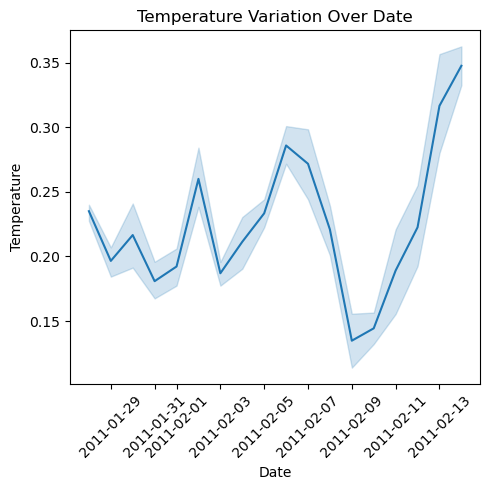

In [10]:
# Temperature Over Date

plt.figure(figsize=(5, 5))
sns.lineplot(data=df1, x='dteday', y='temp')
plt.title('Temperature Variation Over Date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

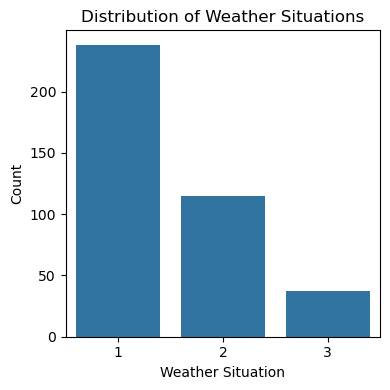

In [11]:
# Weather Situation Count
plt.figure(figsize=(4, 4))
sns.countplot(data=df1, x='weathersit')
plt.title('Distribution of Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [12]:
# Pie Chart of Weather Situations
weather_counts = df1['weathersit'].value_counts().sort_index()
print(weather_counts)
labels = ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain']


weathersit
1    238
2    115
3     37
Name: count, dtype: int64


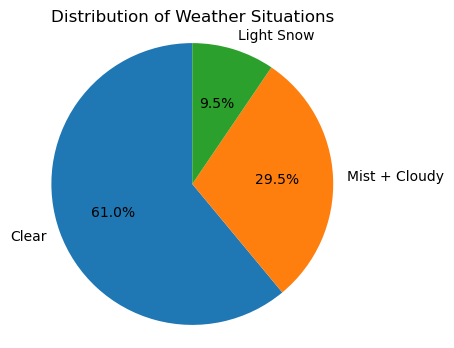

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(weather_counts, labels=labels[:len(weather_counts)], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Situations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Dataset A(Merged from Datase 1 and Dataset2)
### Load dataset_A

In [14]:
# Load dataset_A
file_path = "dataset_A.csv"
df2 = pd.read_csv(file_path)
df2.head()

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
#list of columns names for df
print(df2.columns.tolist())

['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### Check and handle for Missing values

In [16]:
# Check for Missing  
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 instant       0
dteday        0
season        0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


No missing values present in dataset

In [17]:
# Check Duplicate Values
print("\nDuplicate Rows:", df2.duplicated().sum())


Duplicate Rows: 0


no dulicate values present in dataset

In [18]:
# Remove unnecessary columnsc(yr and month ,because already there in date)
df2.drop(columns=['instant'], inplace=True , errors='ignore')
df2.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Check Data Types
print(df2.dtypes)

dteday         object
season          int64
hr              int64
holiday         int64
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [20]:
# Convert dteday to datetime
df2['dteday'] = pd.to_datetime(df1['dteday'], format='%d-%m-%Y')
df2.dtypes

dteday        datetime64[ns]
season                 int64
hr                     int64
holiday                int64
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### 3.Visualisation


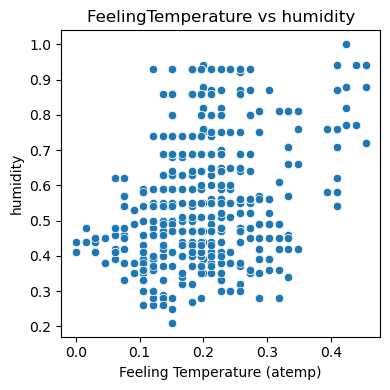

In [21]:
# Scatter plot: Feeling Temperature vs humidity
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df2, x='atemp', y='hum')
plt.title('FeelingTemperature vs humidity')
plt.xlabel('Feeling Temperature (atemp)')
plt.ylabel('humidity')
plt.tight_layout()
plt.show()

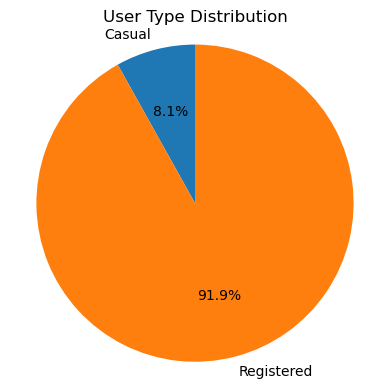

In [22]:
# Pie chart of casual vs registered users
user_totals = [df2['casual'].sum(), df2['registered'].sum()]
labels = ['Casual', 'Registered']
plt.figure(figsize=(4, 4))
plt.pie(user_totals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('User Type Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
df1.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-29,1,1,0,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,2011-01-29,1,2,0,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,2011-01-29,1,3,0,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,2011-01-29,1,4,0,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,2011-01-29,1,6,0,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [24]:
df2.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-29,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-29,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-29,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-29,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-29,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


## Concatenate both datasets 

### 1.Merging

In [25]:
dataset_B = pd.concat([df1, df2], axis=0, ignore_index=True)
dataset_B.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-29,1,1,0,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,2011-01-29,1,2,0,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,2011-01-29,1,3,0,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,2011-01-29,1,4,0,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,2011-01-29,1,6,0,6,1,0.16,0.1818,0.64,0.1343,0,2,2


### 2.Data Preprocessing

In [26]:
#Missing values
print("Missing Values:\n", dataset_B.isnull().sum())

Missing Values:
 dteday        220
season          0
hr              0
holiday         0
weekday         0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64


we found one column(atemp) with null values dteday , so fill it with mean()


In [27]:
# dataset_B['Date_numeric'] = dataset_B['dteday'].astype('int64')
# dataset_B['Date_numeric'] = dataset_B['Date_numeric'].fillna(dataset_B['Date_numeric'].mean())
# dataset_B['dteday'] = pd.to_datetime(dataset_B['Date_numeric'])
# #Missing values
# print("Missing Values:\n", dataset_B.isnull().sum())

In [28]:
# Convert datetime to int (nanoseconds since epoch), drop NaNs
timestamps = dataset_B['dteday'].dropna().values.astype(np.int64)
mean_ts = pd.to_datetime(timestamps.mean())
# Fill missing with mean
dataset_B['dteday'] = dataset_B['dteday'].fillna(mean_ts)
dataset_B.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-29,1,1,0,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,2011-01-29,1,2,0,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,2011-01-29,1,3,0,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,2011-01-29,1,4,0,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,2011-01-29,1,6,0,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [29]:
# Duplicate Values
print("\nDuplicate Rows:", dataset_B.duplicated().sum())


Duplicate Rows: 0


In [30]:
#ceck DataTypes
print(dataset_B.dtypes)

dteday        datetime64[ns]
season                 int64
hr                     int64
holiday                int64
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [31]:
# Remove unnecessary columnsc(yr and month ,because already there in date)
dataset_B.drop(columns=['instant'], inplace=True , errors='ignore')
print(dataset_B.dtypes)

dteday        datetime64[ns]
season                 int64
hr                     int64
holiday                int64
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### 3.Visualization

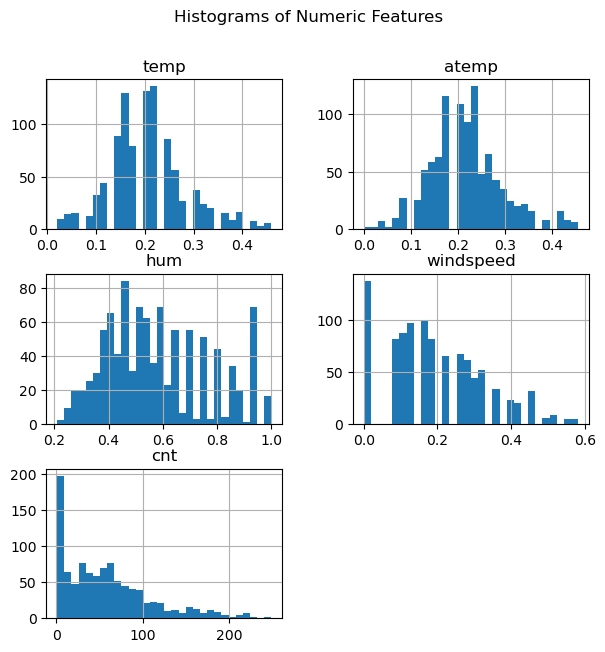

In [32]:
# Histogram for continuous features
dataset_B[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=30, figsize=(7, 7))
plt.suptitle('Histograms of Numeric Features')
plt.show()


### Correlation

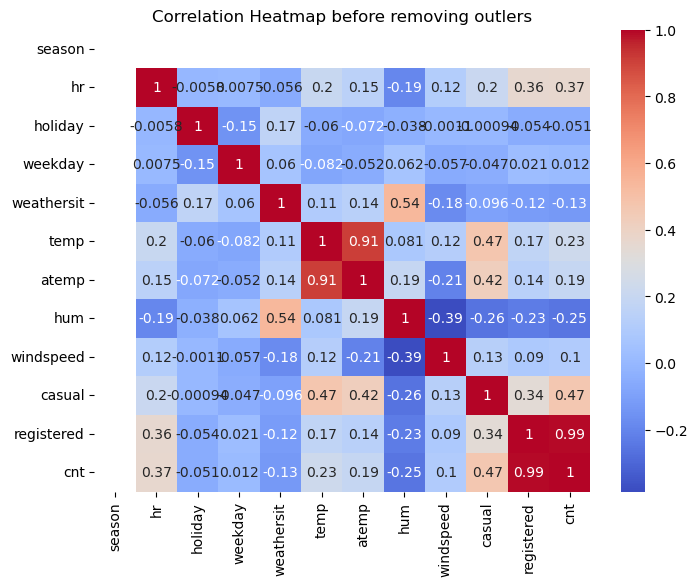

In [33]:
# Correlation heatmap before removing outlers
plt.figure(figsize=(8, 6))
sns.heatmap(dataset_B.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap before removing outlers")
plt.show()

### Outliers

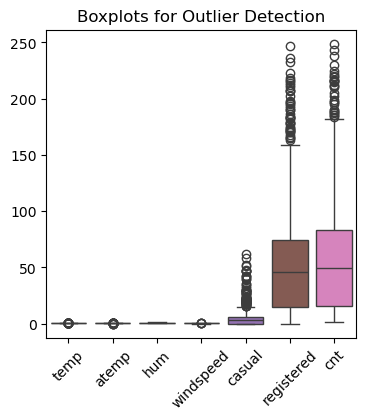

In [34]:
# Boxplots to detect outliers
plt.figure(figsize=(4,4))
sns.boxplot(data=dataset_B[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.show()

In [35]:
# -------------------- 2. Handle Outliers --------------------

# Example: Remove outliers using IQR for 'cnt'
Q1 = dataset_B['cnt'].quantile(0.25)
Q3 = dataset_B['cnt'].quantile(0.75)
IQR = Q3 - Q1
dataset_B = dataset_B[(dataset_B['cnt'] >= Q1 - 1.5 * IQR) & (dataset_B['cnt'] <= Q3 + 1.5 * IQR)]

# Example: Remove outliers using IQR for 'registered'
Q1 = dataset_B['registered'].quantile(0.25)
Q3 = dataset_B['registered'].quantile(0.75)
IQR = Q3 - Q1
dataset_B = dataset_B[(dataset_B['registered'] >= Q1 - 1.5 * IQR) & (dataset_B['registered'] <= Q3 + 1.5 * IQR)]

# Example: Remove outliers using IQR for 'casual'
Q1 = dataset_B['casual'].quantile(0.25)
Q3 = dataset_B['casual'].quantile(0.75)
IQR = Q3 - Q1
dataset_B = dataset_B[(dataset_B['casual'] >= Q1 - 1.5 * IQR) & (dataset_B['casual'] <= Q3 + 1.5 * IQR)]



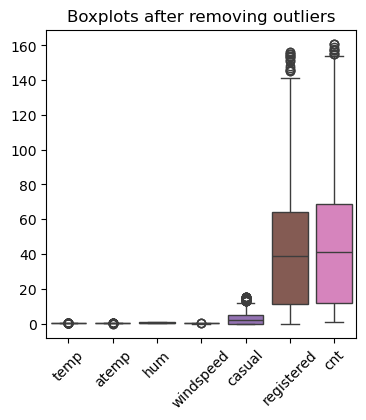

In [36]:
# Boxplots after removing outliers
plt.figure(figsize=(4,4))
sns.boxplot(data=dataset_B[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.xticks(rotation=45)
plt.title("Boxplots after removing outliers")
plt.show()

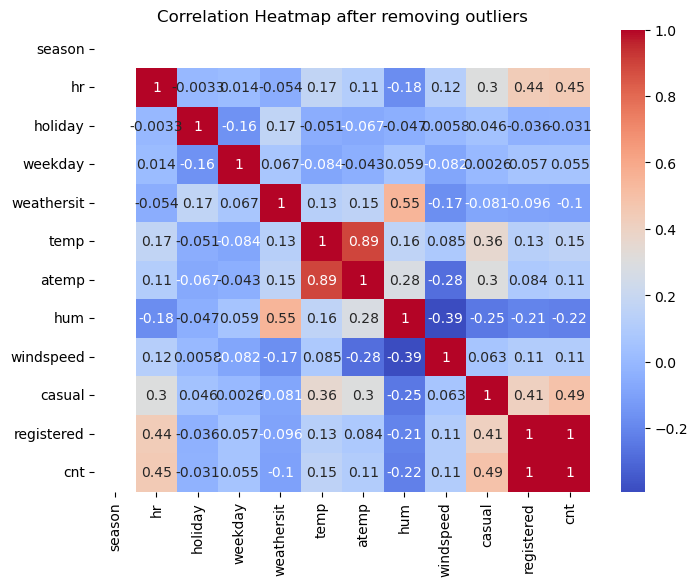

In [37]:
# Correlation heatmap removing outliers
plt.figure(figsize=(8,6))
sns.heatmap(dataset_B.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap after removing outliers")
plt.show()

### 3.Skewness and Kurtosis

In [38]:
# --------------------  Skewness and Kurtosis --------------------

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
skew_kurt_df = pd.DataFrame({
    'Skewness': dataset_B[numeric_cols].apply(skew),
    'Kurtosis': dataset_B[numeric_cols].apply(kurtosis)
})
print("Skewness and Kurtosis:\n", skew_kurt_df)

Skewness and Kurtosis:
             Skewness  Kurtosis
temp        0.558176  1.210733
atemp       0.391777  0.962903
hum         0.390445 -0.794694
windspeed   0.461718 -0.199934
casual      1.315916  1.079462
registered  0.921537  0.487935
cnt         0.810294  0.195221


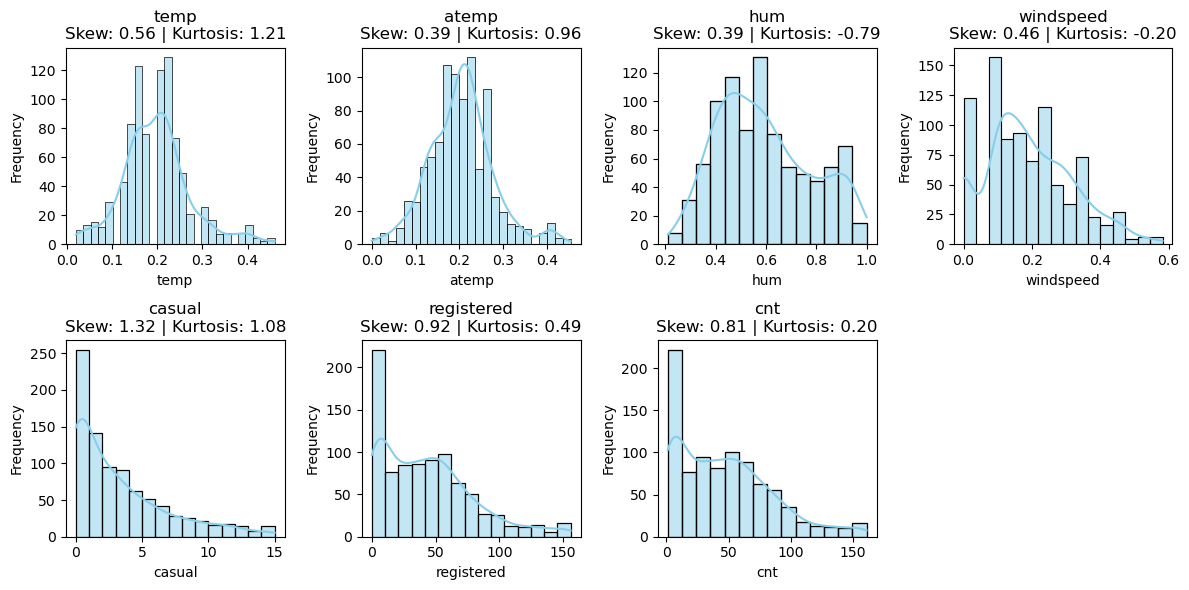

In [39]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Select numeric columns only
numeric_cols = dataset_B[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
# Total number of columns to plot
num_cols = len(numeric_cols.columns)

# Define 2 rows, calculate columns needed per row
rows = 2
cols = math.ceil(num_cols / rows)

# Set up figure size dynamically
plt.figure(figsize=(3 * cols, 3* rows))

# Loop through each numeric column
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(dataset_B[col].dropna(), kde=True, color='skyblue')
    
    # Compute skewness and kurtosis
    skewness = skew(dataset_B[col].dropna())
    kurt = kurtosis(dataset_B[col].dropna())
    
    # Update title with both metrics
    plt.title(f'{col}\nSkew: {skewness:.2f} | Kurtosis: {kurt:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 5.Save final dataset in CSV file

In [40]:
# Save to CSV file
dataset_B.to_csv('dataset_B.csv', index=False)

In [41]:
file_path1 = "dataset_B.csv"
df3 = pd.read_csv(file_path1)
df3.head()

,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-29 00:00:00.000000000,1,1,0,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,2011-01-29 00:00:00.000000000,1,2,0,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,2011-01-29 00:00:00.000000000,1,3,0,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,2011-01-29 00:00:00.000000000,1,4,0,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,2011-01-29 00:00:00.000000000,1,6,0,6,1,0.16,0.1818,0.64,0.1343,0,2,2
